<a href="https://colab.research.google.com/github/yashvyas1405/Sales-Forecasting-using-LSTM/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
warnings.simplefilter('ignore')

In [ ]:
data = pd.read_excel('Sales.xlsx', sheet_name = 'Sales Data (Y)')

In [ ]:
#Brief look at the dataset.
data.head()

,MonthYear,Sales (USD),"Keyword ""Smart Light""_new","Keyword ""Spectra Lights""_new",Total e-visits,Fruitful e-Visits,App Activation,Media Cost(USD),Impressions,Total Conversions,Total Revenue(USD),Conversion Rate
0,2018-01-01,1.277436e+07,7100.604214,17522.789360,859722.843159,479375.771578,21782.947260,15156.731611,4.955934e+05,0.0,0.0,0.0
1,2018-02-01,1.036432e+07,7127.604989,17722.456380,654678.023871,341842.015470,12486.103524,15088.912392,8.359352e+05,0.0,0.0,0.0
2,2018-03-01,1.205030e+07,7137.604989,17811.870009,777274.661487,313547.818329,10095.742523,23322.251016,1.262915e+06,0.0,0.0,0.0
3,2018-04-01,7.208492e+06,7338.042098,14522.789367,448645.184682,201519.429645,8013.834359,24924.609359,8.303825e+05,0.0,0.0,0.0
4,2018-05-01,7.372996e+06,7538.479206,11233.708725,486559.210853,266545.593076,7978.346444,9985.943354,9.699162e+04,0.0,0.0,0.0


In [ ]:
#We are having 30 rows and 12 columns(1 target variable and 11 features)
data.shape

(30, 12)

In [ ]:
#Lets have a look at the kind of data types that is being used to store the variables in pandas.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   MonthYear                     30 non-null     datetime64[ns]
 1   Sales (USD)                   30 non-null     float64       
 2   Keyword "Smart Light"_new     30 non-null     float64       
 3   Keyword "Spectra Lights"_new  30 non-null     float64       
 4   Total e-visits                30 non-null     float64       
 5   Fruitful e-Visits             30 non-null     float64       
 6   App Activation                30 non-null     float64       
 7   Media Cost(USD)               30 non-null     float64       
 8   Impressions                   30 non-null     float64       
 9   Total Conversions             30 non-null     float64       
 10  Total Revenue(USD)            30 non-null     float64       
 11  Conversion Rate               30 n

In [ ]:
#Checking any null value if present.
data.isnull().sum()

MonthYear                       0
Sales (USD)                     0
Keyword "Smart Light"_new       0
Keyword "Spectra Lights"_new    0
Total e-visits                  0
Fruitful e-Visits               0
App Activation                  0
Media Cost(USD)                 0
Impressions                     0
Total Conversions               0
Total Revenue(USD)              0
Conversion Rate                 0
dtype: int64

In [ ]:
#To check if any dublicate values present in the data.
data.nunique()

MonthYear                       30
Sales (USD)                     30
Keyword "Smart Light"_new       30
Keyword "Spectra Lights"_new    30
Total e-visits                  30
Fruitful e-Visits               30
App Activation                  30
Media Cost(USD)                 30
Impressions                     30
Total Conversions               18
Total Revenue(USD)              18
Conversion Rate                 18
dtype: int64

In [ ]:
data.describe()

,Sales (USD),"Keyword ""Smart Light""_new","Keyword ""Spectra Lights""_new",Total e-visits,Fruitful e-Visits,App Activation,Media Cost(USD),Impressions,Total Conversions,Total Revenue(USD),Conversion Rate
count,3.000000e+01,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000
mean,1.099553e+07,8277.145216,16460.379802,7.303860e+05,205933.674199,9691.924371,6394.093184,4.803220e+05,484.695733,101.761026,0.015870
std,5.834052e+06,3123.271675,8766.617406,2.502434e+05,152665.228952,5416.026455,7146.926634,6.259447e+05,606.796004,201.355468,0.021969
min,6.757654e+06,3373.475214,0.000000,3.313985e+05,66564.623276,5162.922388,102.446112,1.101505e+04,0.000000,0.000000,0.000000
25%,7.904108e+06,6021.272492,8163.114421,5.164092e+05,85742.406339,6717.275726,1310.752138,6.205531e+04,0.000000,0.000000,0.000000
50%,8.959379e+06,7875.233328,17679.801626,7.128628e+05,129903.331878,7868.195323,2589.866627,1.171334e+05,237.322680,13.227803,0.006430
75%,1.164061e+07,10380.120267,21992.615567,8.644377e+05,279251.251793,9936.578978,9308.182229,8.345471e+05,778.539162,77.058850,0.027937
max,3.199876e+07,15429.371683,32803.115184,1.344321e+06,605385.928850,30587.315751,24924.609359,2.351014e+06,2115.677419,721.946598,0.086348


In [ ]:
#Datetime Variable
#Converting object datatype to date time datatype.
data['MonthYear'] = pd.to_datetime(data['MonthYear'], format='%Y-%m')

In [ ]:
data['MonthYear'] = data['MonthYear'].apply(lambda x: x.strftime('%Y-%m'))
#data.set_index('MonthYear', inplace=True)

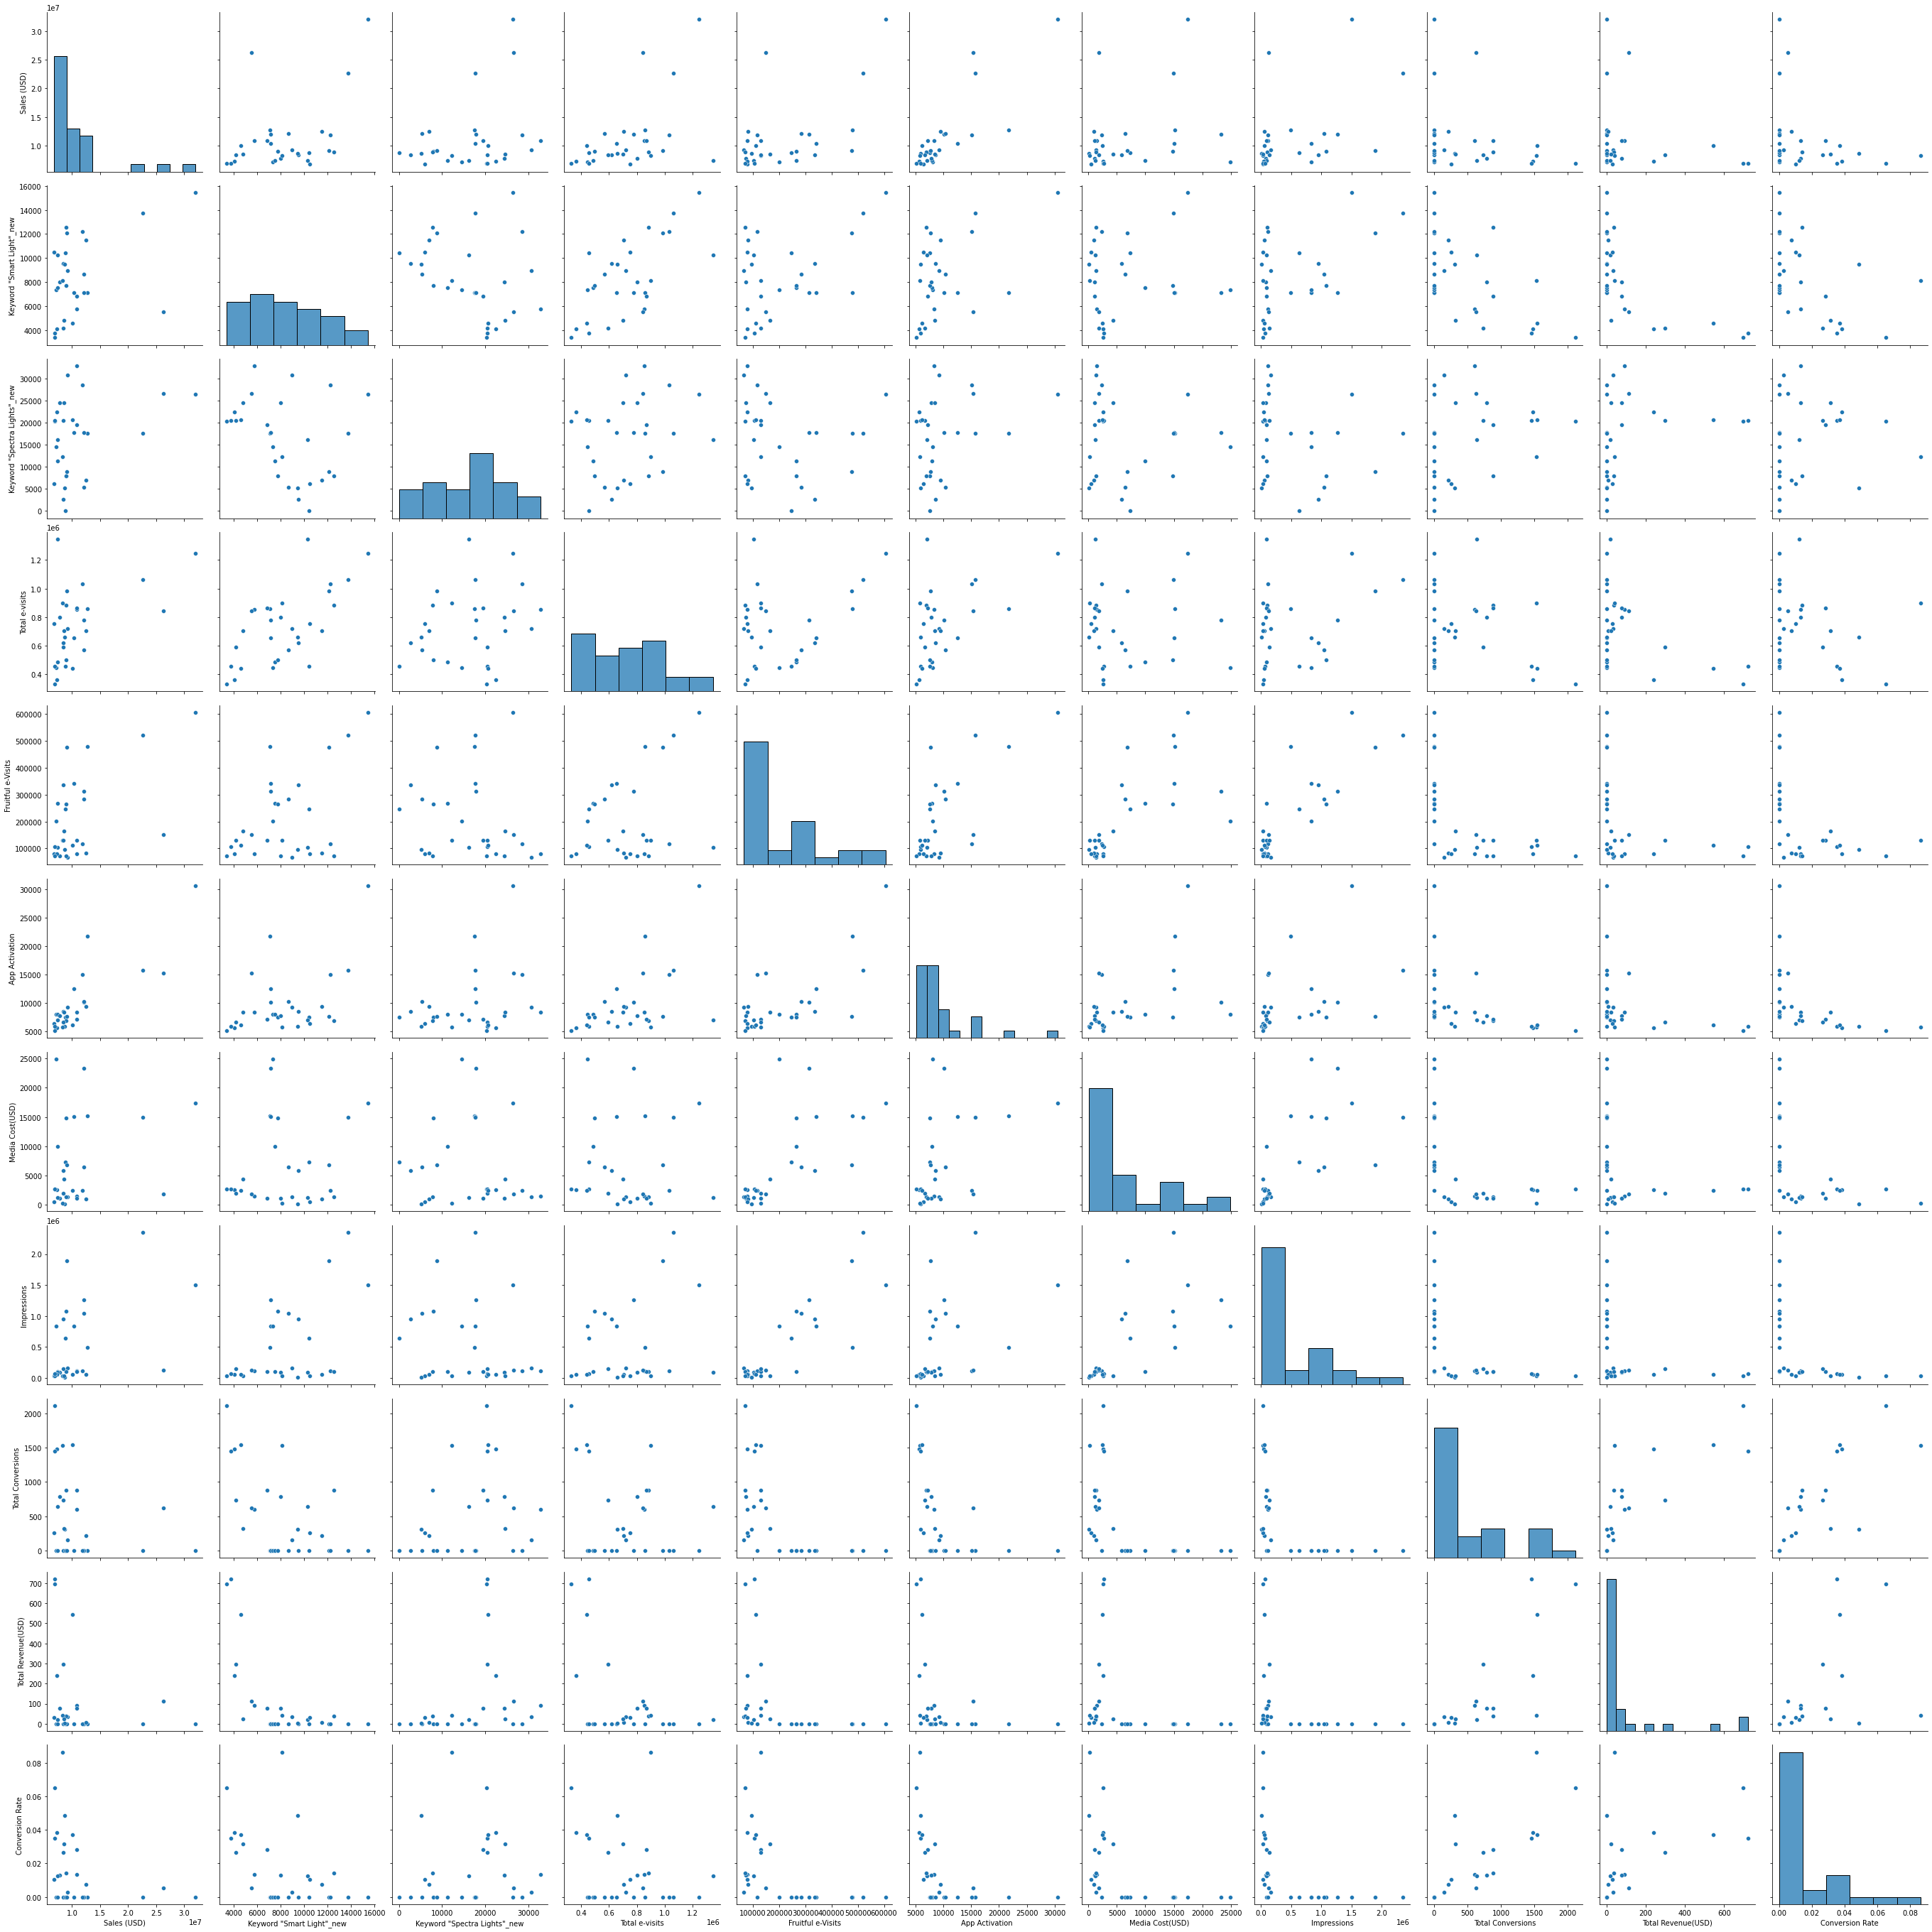

In [ ]:
#Analyzing variables 
#1. Numerical Variables

sns.pairplot(data, height = 3.5)

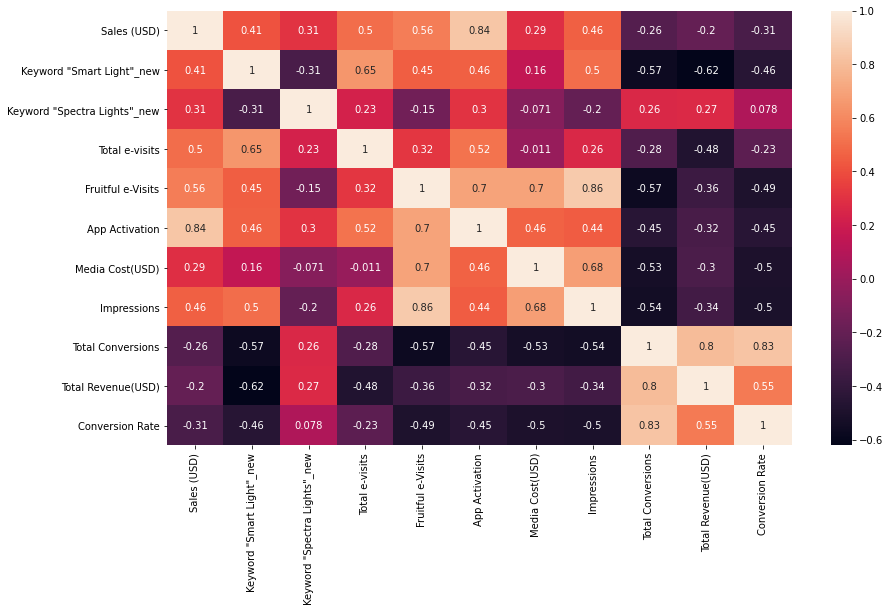

In [ ]:
#Creating a correlation graph of the numerical variables to study the relationship between two variables simultaneouly.
'''A coefficient close to 1 means that there’s a very strong positive correlation between the two variables.
Here dark color shows very strong correlation.The diagonal line is the correlation of the variables to themselves.
If it is close to 0 then it means linear correlation is WEAK.
If it is close to 1 then it means linear correlation is STRONG.(lighter shade)'''
plt.figure(figsize=(14, 8))
_ = sns.heatmap(data.corr(), annot=True)

#01 Is feature(website visits important)?

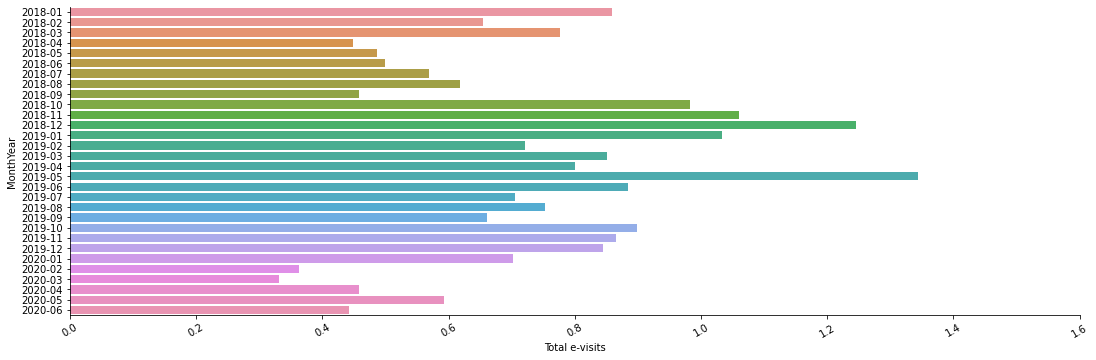

In [ ]:
#FEATURE - 01
a = sns.catplot(x="Total e-visits", y="MonthYear", data=data, height=5, aspect=24/8, kind = 'bar')
_ = a.set_xticklabels(rotation=30)

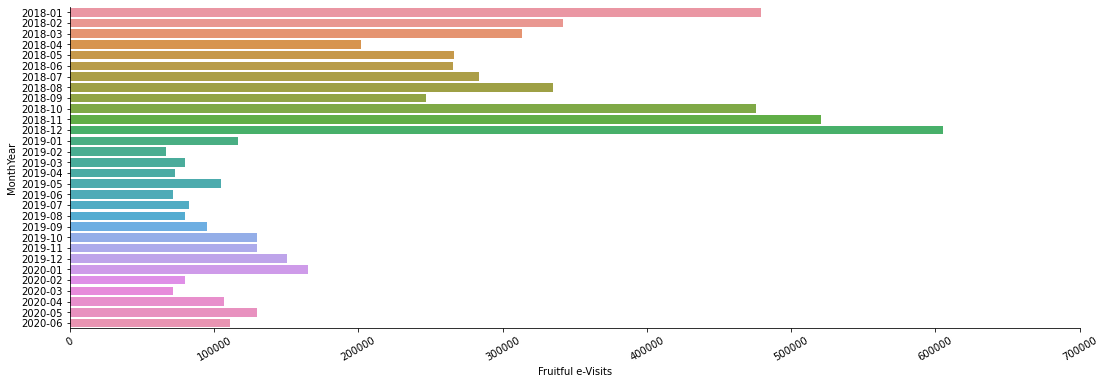

In [ ]:
a = sns.catplot(x="Fruitful e-Visits", y="MonthYear", data=data, height=5, aspect=24/8, kind = 'bar')
_ = a.set_xticklabels(rotation=30)

#02 Feature Advertising Promo

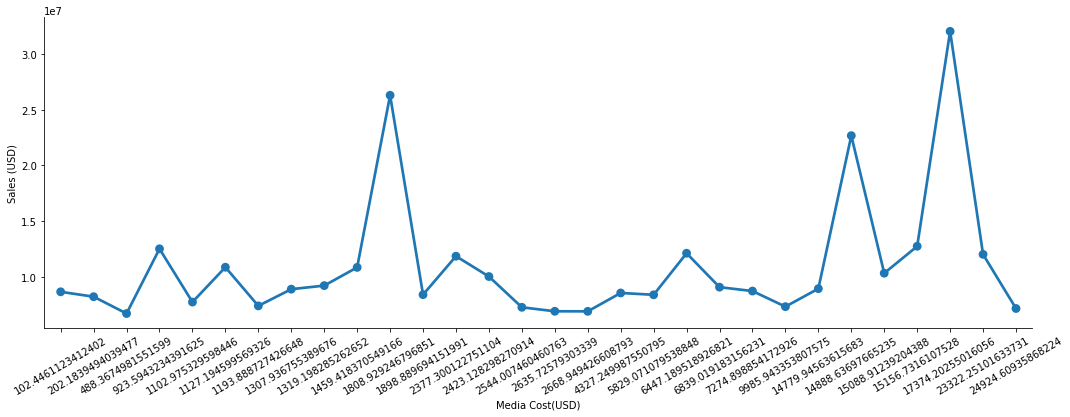

In [ ]:
a = sns.catplot(x="Media Cost(USD)", y="Sales (USD)", data=data, height=5, aspect=24/8, kind = 'point')
_ = a.set_xticklabels(rotation=30)

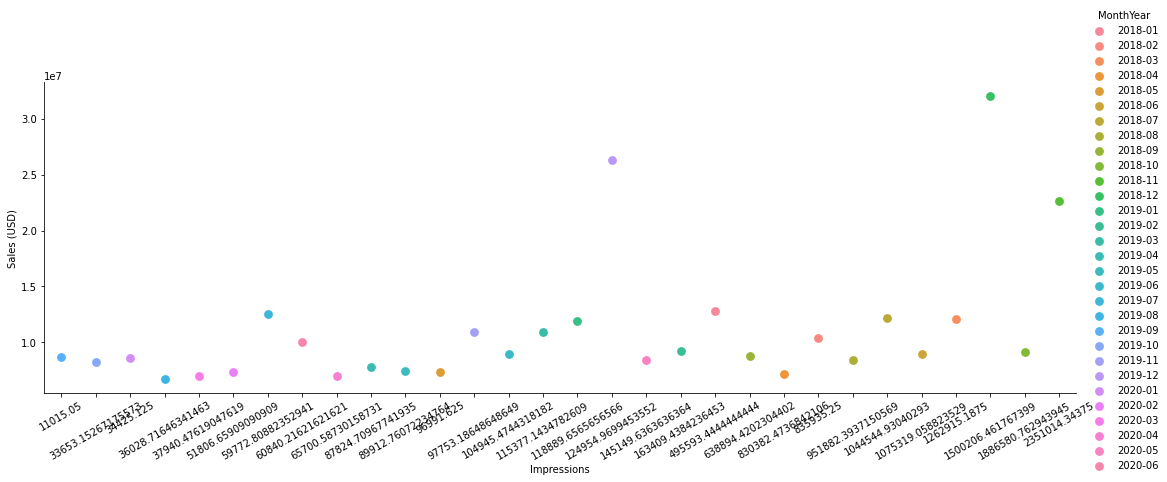

In [ ]:
a = sns.catplot(x="Impressions", y="Sales (USD)", data=data, height=5, aspect=24/8, kind = 'point', hue = 'MonthYear')
_ = a.set_xticklabels(rotation=30)

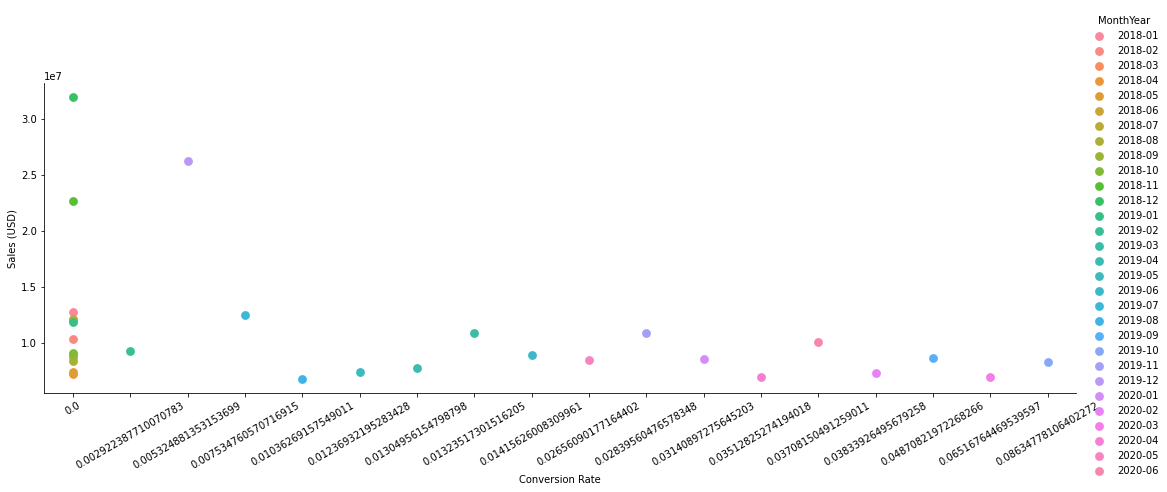

In [ ]:
a = sns.catplot(x="Conversion Rate", y="Sales (USD)", data=data, height=5, aspect=24/8, kind = 'point', hue = 'MonthYear')
_ = a.set_xticklabels(rotation=30)

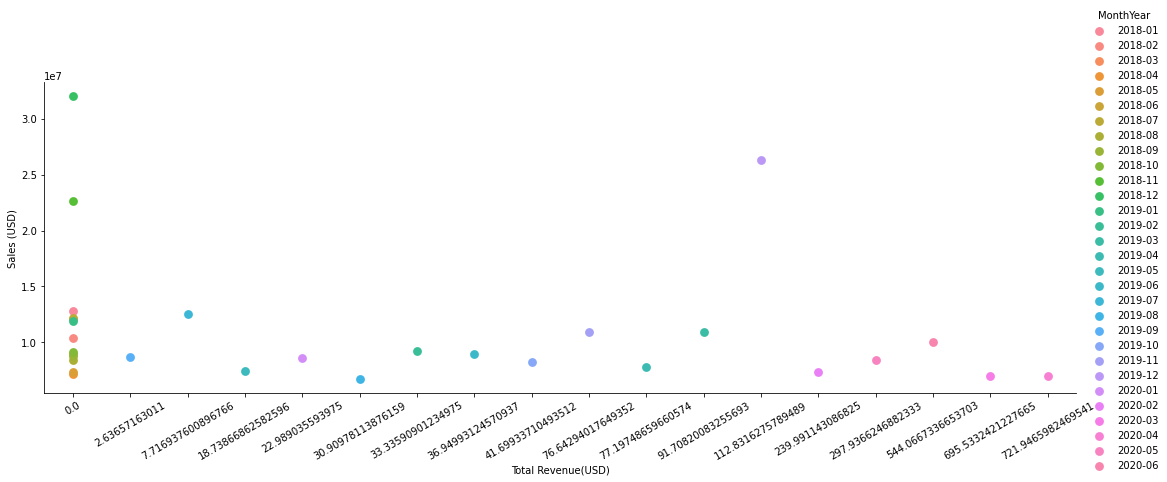

In [ ]:
a = sns.catplot(x="Total Revenue(USD)", y="Sales (USD)", z = 'MonthYear', data=data, height=5, aspect=24/8, kind = 'point', hue = 'MonthYear')
_ = a.set_xticklabels(rotation=30)

#03 Google keyword Search

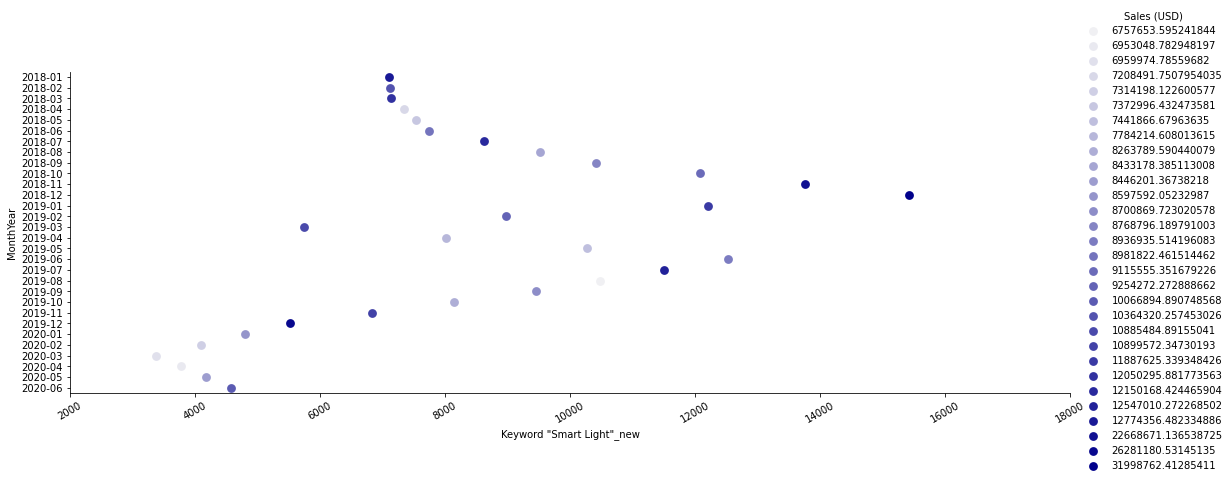

In [ ]:
a = sns.catplot(x="Keyword \"Smart Light\"_new", y="MonthYear", data=data, height=5, aspect=24/8,
                kind = 'point', hue = 'Sales (USD)', color = 'darkblue')
_ = a.set_xticklabels(rotation=30)

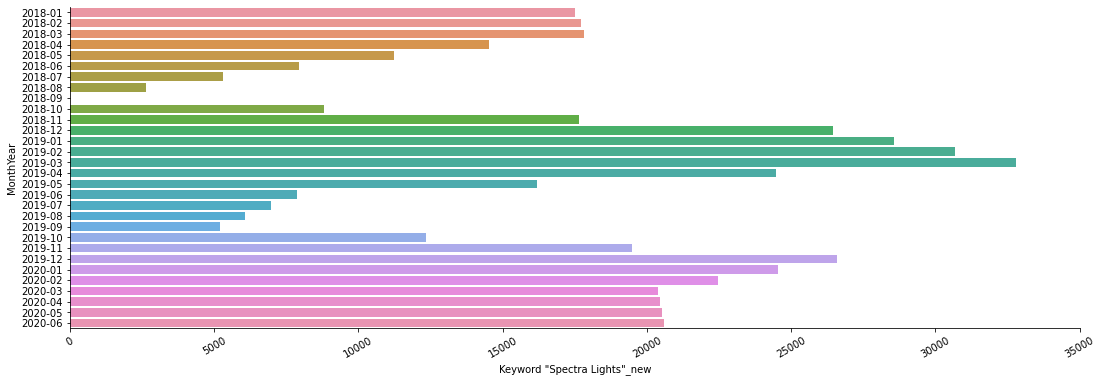

In [ ]:
a = sns.catplot(x="Keyword \"Spectra Lights\"_new", y="MonthYear", data=data, height=5, aspect=24/8, kind = 'bar')
_ = a.set_xticklabels(rotation=30)

#04 App Activation

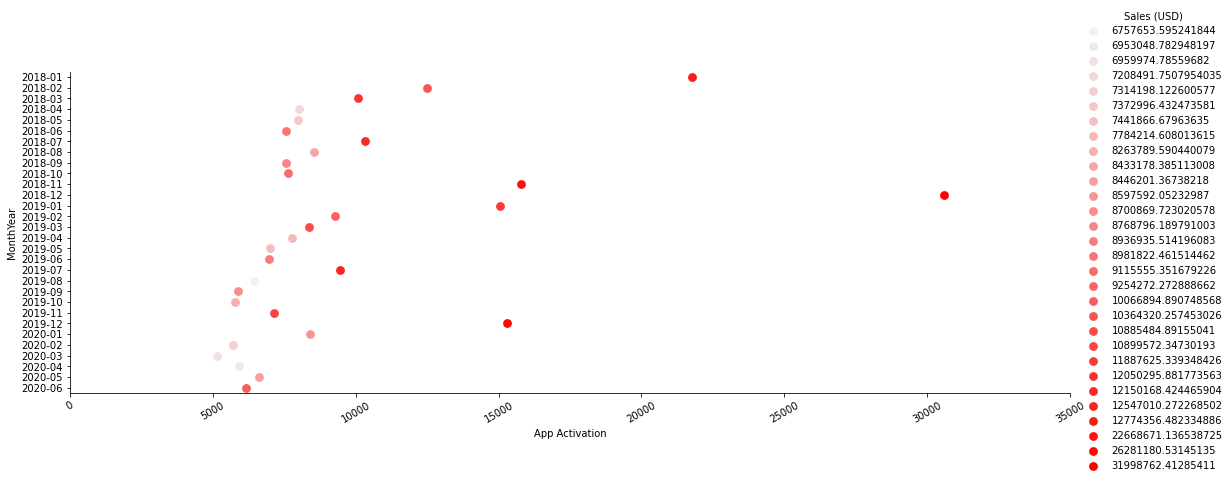

In [ ]:
a = sns.catplot(x="App Activation", y="MonthYear", data=data, height=5, aspect=24/8,
                kind = 'point', hue = 'Sales (USD)', color = 'red')
_ = a.set_xticklabels(rotation=30)

#Model Building

In [ ]:
train_dates = data['MonthYear']

In [ ]:
cols = list(data)[1:11]

In [ ]:
df_for_training = data[cols]

In [ ]:
df_for_training

,Sales (USD),"Keyword ""Smart Light""_new","Keyword ""Spectra Lights""_new",Total e-visits,Fruitful e-Visits,App Activation,Media Cost(USD),Impressions,Total Conversions,Total Revenue(USD)
0,1.277436e+07,7100.604214,17522.789360,8.597228e+05,479375.771578,21782.947260,15156.731611,4.955934e+05,0.000000,0.000000
1,1.036432e+07,7127.604989,17722.456380,6.546780e+05,341842.015470,12486.103524,15088.912392,8.359352e+05,0.000000,0.000000
2,1.205030e+07,7137.604989,17811.870009,7.772747e+05,313547.818329,10095.742523,23322.251016,1.262915e+06,0.000000,0.000000
3,7.208492e+06,7338.042098,14522.789367,4.486452e+05,201519.429645,8013.834359,24924.609359,8.303825e+05,0.000000,0.000000
4,7.372996e+06,7538.479206,11233.708725,4.865592e+05,266545.593076,7978.346444,9985.943354,9.699162e+04,0.000000,0.000000
5,8.981822e+06,7738.916314,7944.628083,4.988718e+05,265622.913169,7562.588449,14779.945636,1.075319e+06,0.000000,0.000000
6,1.215017e+07,8631.322979,5296.418722,5.690213e+05,283486.471365,10336.535696,6447.189519,1.044545e+06,0.000000,0.000000
7,8.433178e+06,9523.729644,2648.209361,6.182322e+05,335065.466155,8557.437939,5829.071080,9.518824e+05,0.000000,0.000000
8,8.768796e+06,10416.136309,0.000000,4.576195e+05,247021.805048,7553.679349,7274.898854,6.388944e+05,0.000000,0.000000
9,9.115555e+06,12087.214767,8818.573436,9.829828e+05,475865.231933,7632.524883,6839.019183,1.886581e+06,0.000000,0.000000


In [ ]:
#Normalize the data
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1
n_past = 3

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
  trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
  trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (27, 3, 10).
trainY shape == (27, 1).


In [ ]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 3, 128)            71168     
_________________________________________________________________
dropout_38 (Dropout)         (None, 3, 128)            0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 3, 64)             49408     
_________________________________________________________________
dropout_39 (Dropout)         (None, 3, 64)             0         
_________________________________________________________________
lstm_50 (LSTM)               (None, 3, 32)             12416     
_________________________________________________________________
dropout_40 (Dropout)         (None, 3, 32)             0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 32)              

In [ ]:
history = model.fit(trainX, trainY, epochs=10, batch_size=5, validation_split=0.1, verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 32ms/step - loss: 0.3183 - val_loss: 0.2451
Epoch 2/10
5/5 [==============================] - 0s 19ms/step - loss: 0.5570 - val_loss: 0.2051
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.2592 - val_loss: 0.0755
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.2236 - val_loss: 0.0750
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.3725 - val_loss: 0.0912
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 0.3438 - val_loss: 0.1102
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1425 - val_loss: 0.1231
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1172 - val_loss: 0.1191
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.5094 - val_loss: 0.0997
Epoch 10/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1719 - val_loss: 0.0874


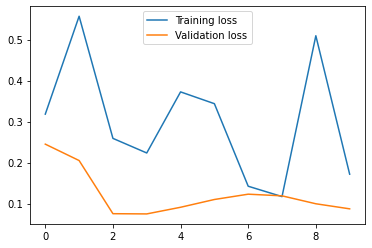

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
n_future=12  #Redefining n_future to extend prediction dates beyond original n_future dates...
forecast_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1m').tolist()

In [ ]:
forecast = model.predict(trainX[-n_future:]) #forecast

In [ ]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(forecast_copies)[:,0]

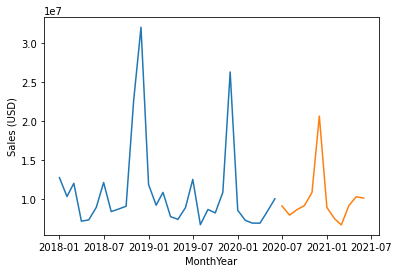

In [ ]:
# Convert timestamp to date
forecast_dates = []
for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'MonthYear':np.array(forecast_dates), 'Sales (USD)':y_pred_future})
df_forecast['MonthYear']=pd.to_datetime(df_forecast['MonthYear'], format='%Y-%m')


original = data[['MonthYear', 'Sales (USD)']]
original['MonthYear']=pd.to_datetime(original['MonthYear'], format='%Y-%m')

sns.lineplot(original['MonthYear'], original['Sales (USD)'])
sns.lineplot(df_forecast['MonthYear'], df_forecast['Sales (USD)'])